# ¿Tus hábitos afectan tu nota final? 🧠

## Introducción 📌


En el ámbito académico, el rendimiento estudiantil se evalúa comúnmente mediante las calificaciones obtenidas; sin embargo, estos indicadores numéricos no reflejan en su totalidad los factores que inciden en el desempeño. Más allá del dominio del contenido curricular y las capacidades cognitivas, los hábitos cotidianos pueden influir de manera significativa en los resultados académicos. Variables como las horas dedicadas al estudio, el uso de redes sociales, la calidad del sueño, la alimentación y el estado de salud mental forman parte de la rutina diaria de los estudiantes y pueden estar asociadas, positiva o negativamente, con su rendimiento académico.

La comprensión de estas relaciones resulta esencial no solo para los propios estudiantes que buscan mejorar su desempeño, sino también para educadores, instituciones y responsables de políticas educativas interesados en promover entornos de aprendizaje más eficaces y saludables.

El presente estudio se propone analizar y determinar cuáles hábitos tienen un mayor impacto en el rendimiento académico.





## Sobre el dataset 📁



Este proyecto emplea un conjunto de datos simulado pero realista, denominado “Student Habits vs Academic Performance”, que comprende 1,000 registros de estudiantes y más de 15 variables relacionadas con hábitos de vida diarios y características personales. Entre las variables más relevantes se encuentran:

- Horas diarias dedicadas al estudio, sueño y uso de redes sociales.

- Tiempo promedio diario destinado a plataformas de streaming como Netflix.

- Calidad de la dieta y estado de salud mental autoinformados.

- Porcentaje de asistencia a clases.

- Condición de empleo a medio tiempo.

- Nota final del examen, utilizada como indicador del rendimiento académico.

Este conjunto de datos resulta idóneo para realizar análisis exploratorios, generar visualizaciones descriptivas y desarrollar modelos predictivos sencillos, con el objetivo de esclarecer la influencia de los hábitos cotidianos en el desempeño académico.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


## Carga y descripción de los datos 📥

En esta sección se carga el dataset descargado desde KaggleHub y se realiza una inspección general. Se revisan las dimensiones, tipos de variables, valores faltantes y estadísticas básicas. Esto permite comprender la estructura del conjunto de datos y preparar el terreno para el análisis exploratorio posterior.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np

# Cargar dataset desde la ruta conocida
dataset_path = "/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv"
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas
display(df.head())

# Dimensiones del dataset
print(f"Dimensiones: {df.shape}")

# Información general sobre columnas y tipos de datos
df.info()

# Estadísticas descriptivas generales (numéricas y categóricas)
display(df.describe(include='all').T)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Dimensiones: (1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,1000,1000,S1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1000.0,NaN,NaN,NaN,20.498,2.3081,17.0,18.75,20.0,23.0,24.0
gender,1000,3,Female,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_hours_per_day,1000.0,NaN,NaN,NaN,3.5501,1.46889,0.0,2.6,3.5,4.5,8.3
social_media_hours,1000.0,NaN,NaN,NaN,2.5055,1.172422,0.0,1.7,2.5,3.3,7.2
netflix_hours,1000.0,NaN,NaN,NaN,1.8197,1.075118,0.0,1.0,1.8,2.525,5.4
part_time_job,1000,2,No,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance_percentage,1000.0,NaN,NaN,NaN,84.1317,9.399246,56.0,78.0,84.4,91.025,100.0
sleep_hours,1000.0,NaN,NaN,NaN,6.4701,1.226377,3.2,5.6,6.5,7.3,10.0
diet_quality,1000,3,Fair,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análisis inicial del dataset


A continuación, se detallan las principales observaciones obtenidas tras la carga e inspección preliminar del conjunto de datos:

- Dimensiones: El conjunto de datos está compuesto por 1,000 registros y 16 variables.

- Tipos de variables: Se identifican 9 variables numéricas (tipos int64 y float64) y 7 variables categóricas (tipo object).

- Valores faltantes: Únicamente la variable parental_education_level presenta valores nulos, con 91 registros incompletos, lo que representa el 9.1% del total.

- Identificador único: La variable student_id contiene valores únicos para cada observación, sin aportar valor analítico relevante, por lo que puede considerarse para exclusión en etapas posteriores del análisis.

- Estadísticas descriptivas destacadas:

 - age: edad media de aproximadamente 20.5 años, con un rango de 17 a 24 años.

 - study_hours_per_day: promedio de 3.55 horas diarias, con un máximo de 8.3 horas.

 - social_media_hours: promedio de 2.5 horas diarias en redes sociales.

 - attendance_percentage: promedio de asistencia del 84.13%, con un mínimo del 56%.

 - sleep_hours: promedio de 6.47 horas diarias de sueño.

 - exam_score: puntuación media de 69.6, con una desviación estándar de aproximadamente 16.89.

- Distribución de variables categóricas relevantes:

 - gender: tres categorías, con predominio del género femenino (481 registros).

 - part_time_job: la mayoría de los estudiantes no cuenta con un trabajo de medio tiempo (785 registros con la categoría "No").

 - diet_quality: la categoría más frecuente es "Fair" (437 registros).

 - internet_quality: la categoría "Good" es la más común (447 registros).

 - extracurricular_participation: la mayoría no participa en actividades extracurriculares (682 registros con la categoría "No").

Este análisis preliminar proporciona una visión general de la estructura del conjunto de datos, identificando elementos clave para el análisis exploratorio posterior, como la presencia de valores nulos y la posible irrelevancia de ciertas variables.





### Limpieza inicial


Verificamos la presencia de valores nulos o duplicados y realizamos ajustes en los formatos de las columnas categóricas, como la estandarización del texto.

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")

# Ejemplo de limpieza sencilla: capitalizar valores categóricos
df['gender'] = df['gender'].str.capitalize()
df['diet_quality'] = df['diet_quality'].str.capitalize()
df['part_time_job'] = df['part_time_job'].str.capitalize()
df['exercise_frequency'] = df['exercise_frequency'].astype(str)  # Si quieres convertir a num más adelante, se puede

# Revisar valores únicos para validar limpieza
print("Valores únicos en 'gender':", df['gender'].unique())
print("Valores únicos en 'diet_quality':", df['diet_quality'].unique())
print("Valores únicos en 'part_time_job':", df['part_time_job'].unique())


Valores nulos por columna:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
Duplicados en el dataset: 0
Valores únicos en 'gender': ['Female' 'Male' 'Other']
Valores únicos en 'diet_quality': ['Fair' 'Good' 'Poor']
Valores únicos en 'part_time_job': ['No' 'Yes']


### Calidad de los datos


Se realizó una revisión específica para detectar valores nulos, duplicados y distribución de categorías en algunas variables clave:

Valores nulos por columna:
- Solo la variable `parental_education_level` contiene valores nulos: **91 registros** (9.1% del total).
- El resto de las columnas no presentan datos faltantes.

Duplicados:
- No se encontraron registros duplicados en el dataset (**0 duplicados**).

Distribución de valores únicos:

- `gender`: 3 categorías → **['Female', 'Male', 'Other']**
- `diet_quality`: 3 categorías → **['Fair', 'Good', 'Poor']**
- `part_time_job`: 2 categorías → **['No', 'Yes']**

Esta inspección confirma que el dataset tiene buena calidad general. Solo se requiere imputar los valores nulos en `parental_education_level`, y se recomienda mantener las categorías existentes sin necesidad de recodificación por ahora.


## Análisis Exploratorio de Datos (EDA) 🔍


Antes de construir modelos predictivos o sacar conclusiones, es fundamental entender la estructura y las relaciones dentro de los datos. En esta sección exploraremos cómo se distribuyen las variables más relevantes y cómo se relacionan con la nota final.

Primero, observaremos la distribución de la variable objetivo, que es la nota final en el examen. Esto nos permitirá identificar si la mayoría de los estudiantes obtiene notas altas, bajas o una mezcla balanceada.

Luego, exploraremos la relación entre algunas variables numéricas clave, como las horas de estudio, horas de sueño, tiempo dedicado a redes sociales y la asistencia a clases, para observar posibles patrones o correlaciones con el rendimiento académico.

Finalmente, analizaremos algunas variables categóricas, como la calidad de la dieta, para evaluar cómo estas pueden influir en las calificaciones.

Este análisis nos dará una primera visión sobre qué factores pueden ser importantes para predecir el desempeño académico y qué hábitos podrían estar relacionados con mejores o peores resultados.

### Distribuciones

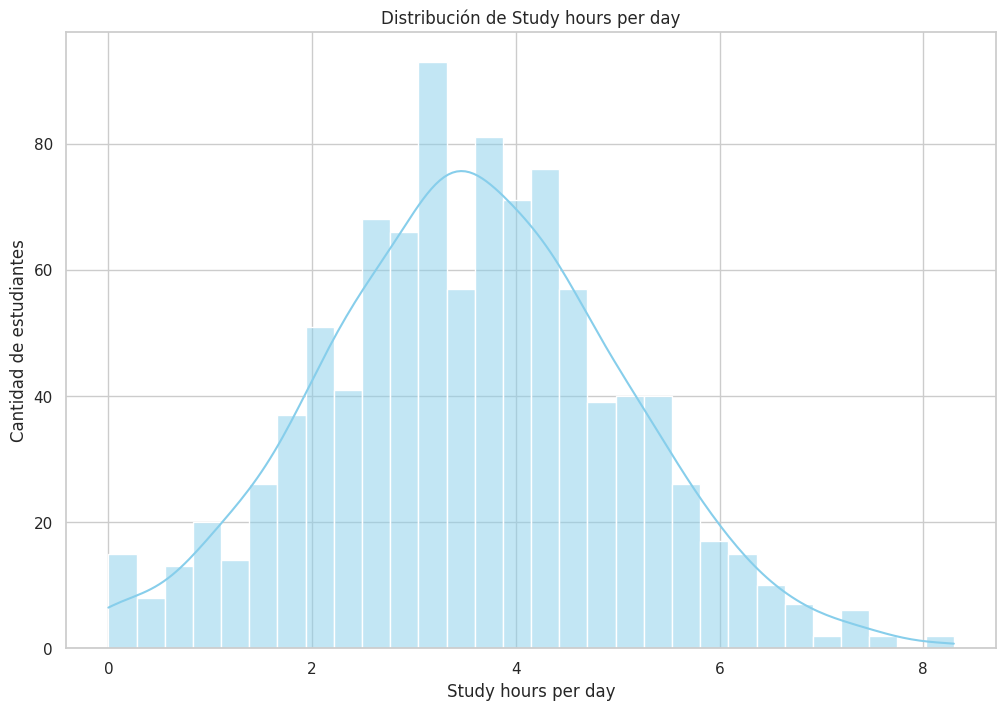

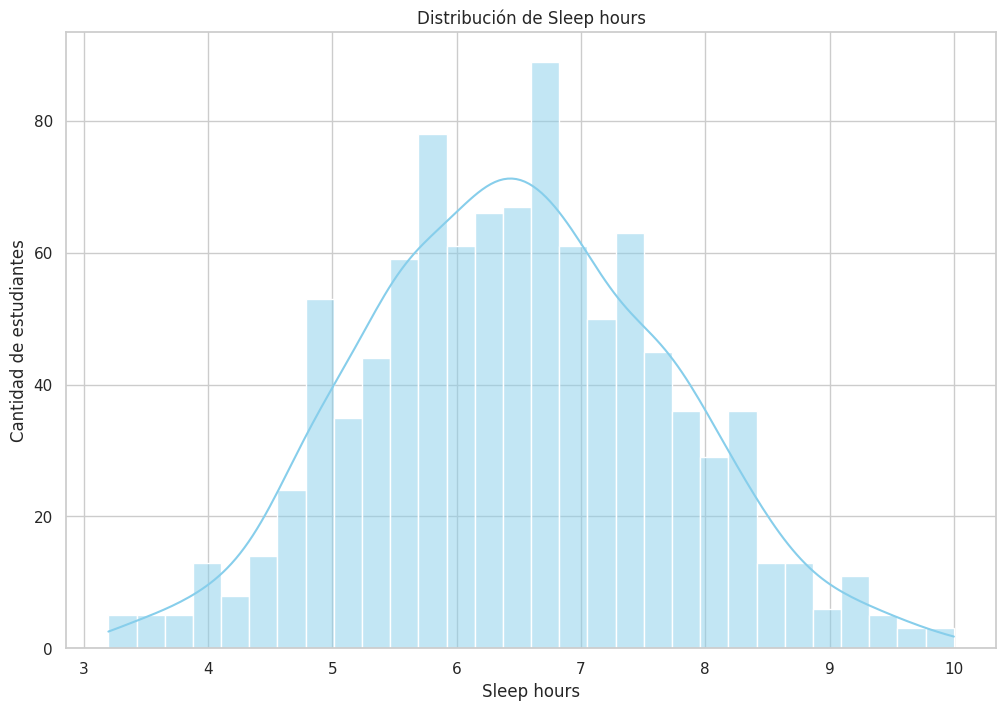

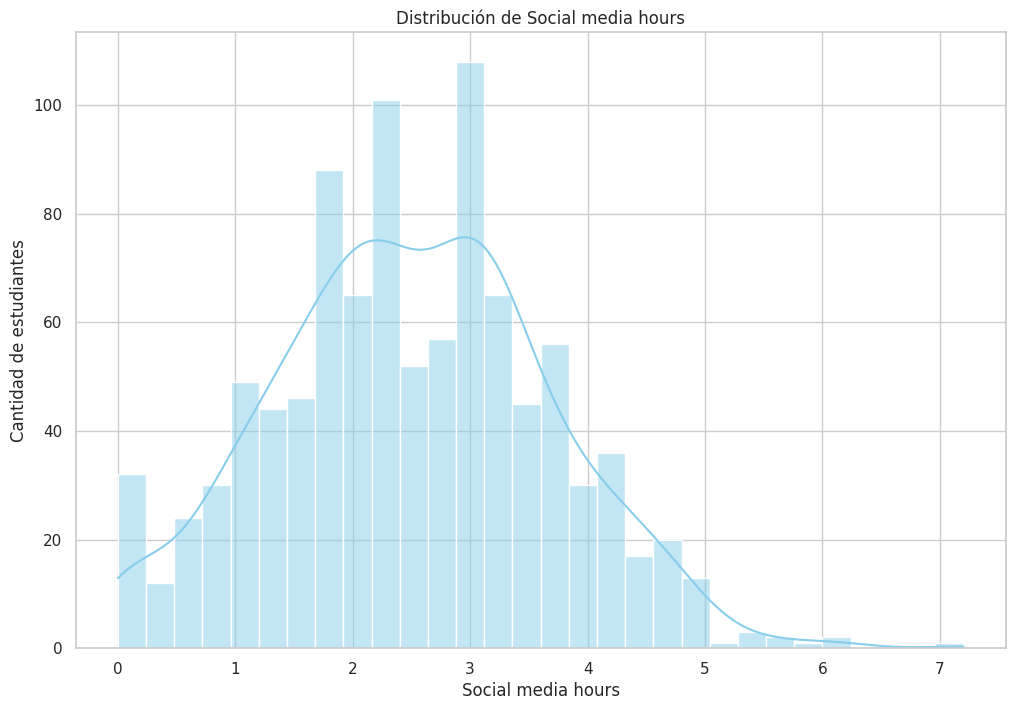

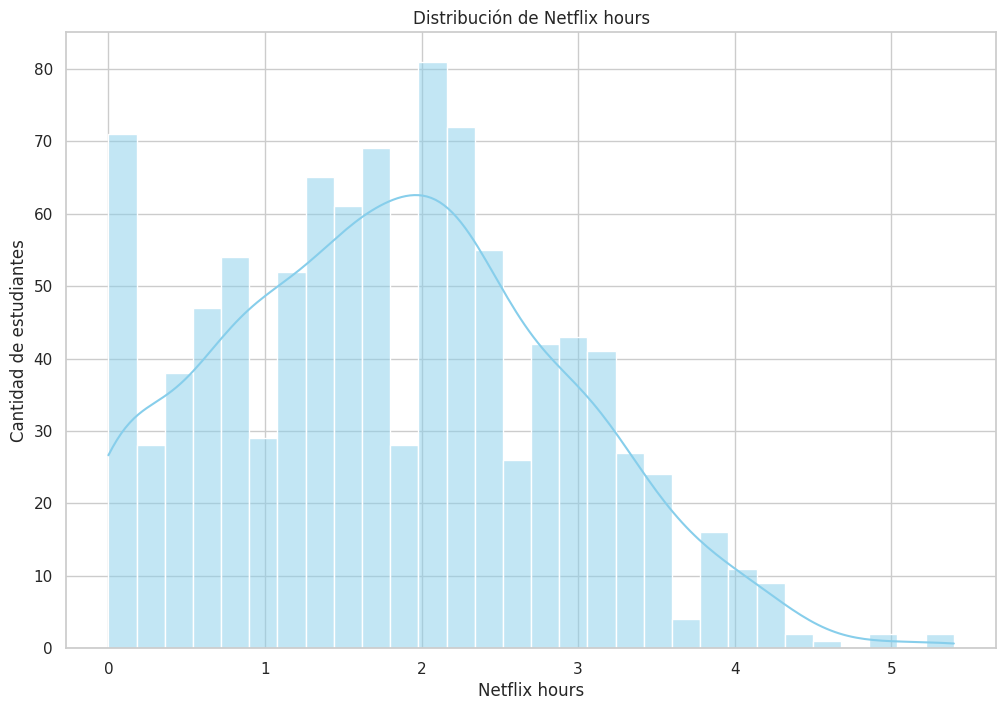

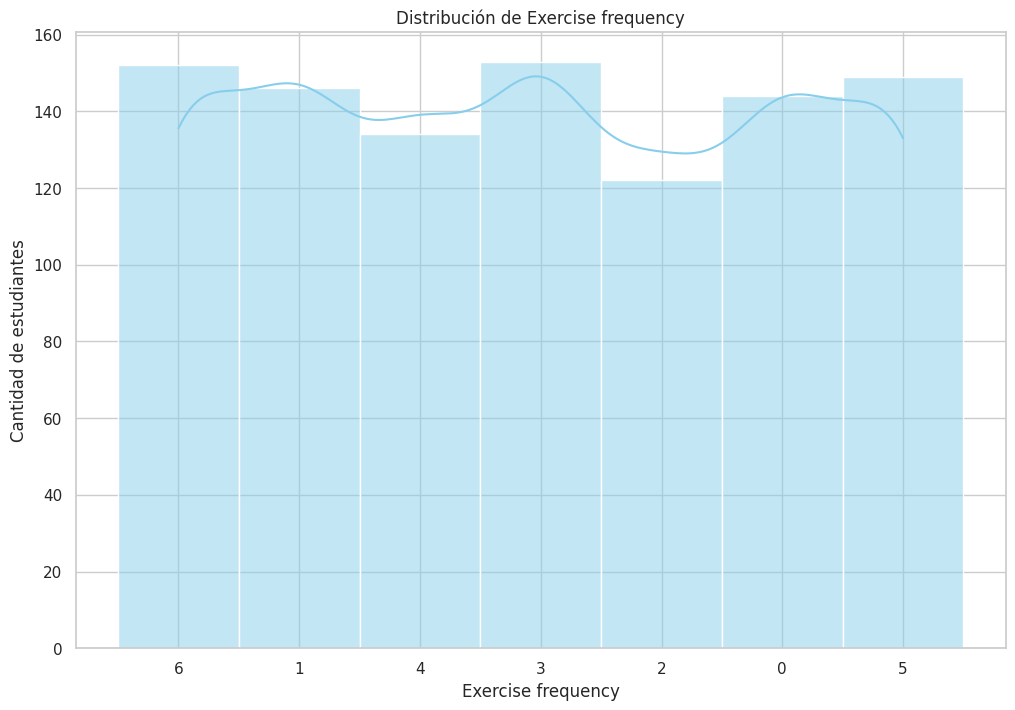

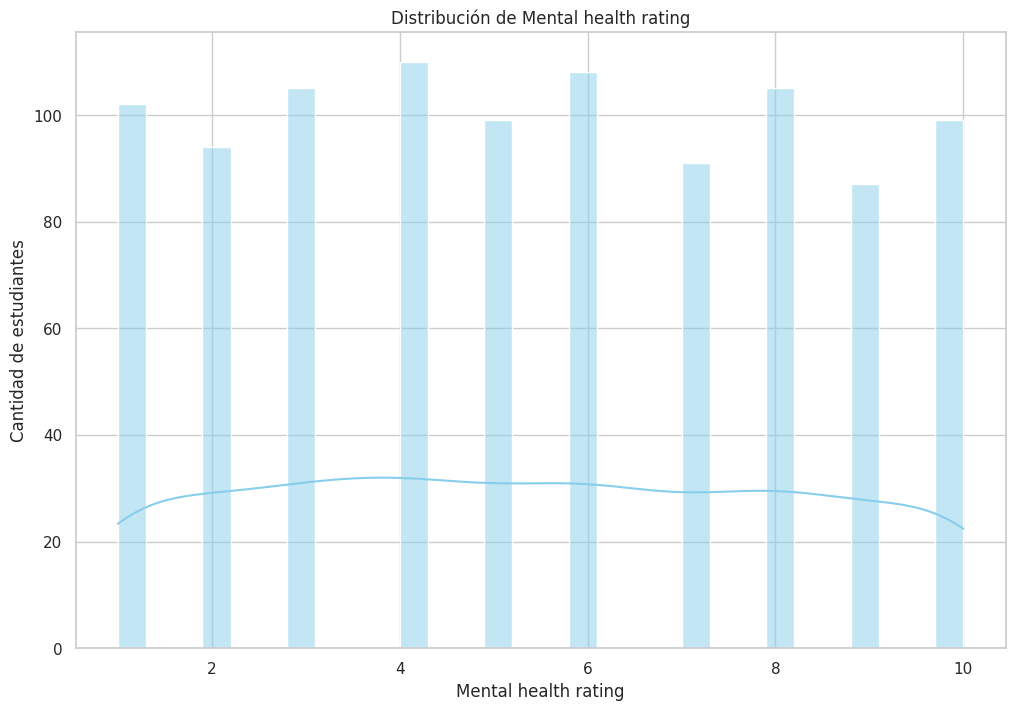

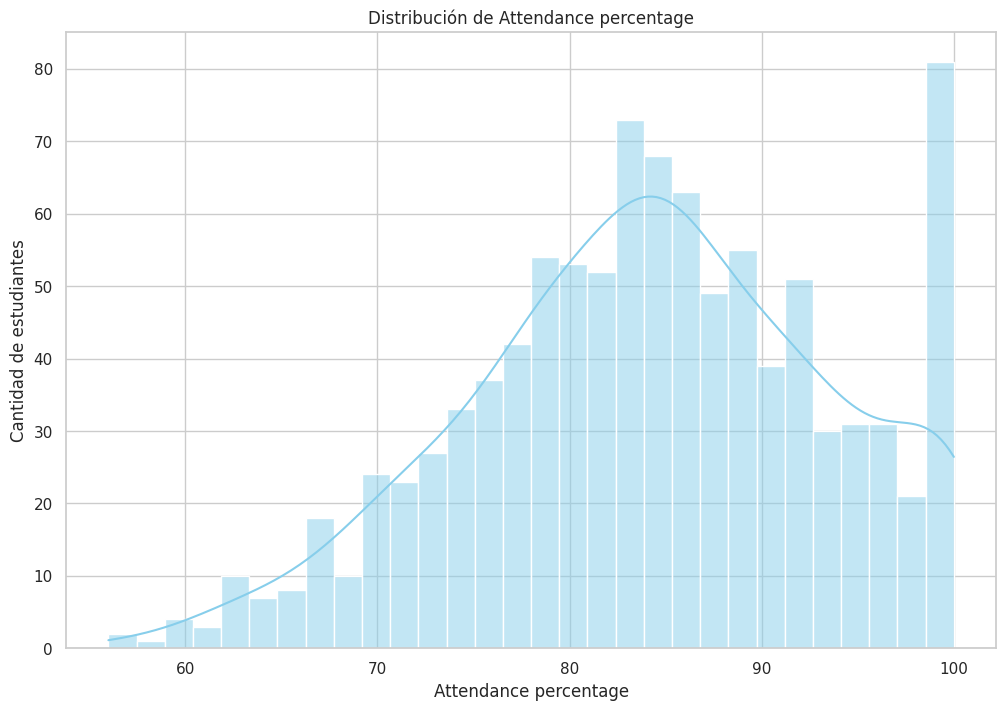

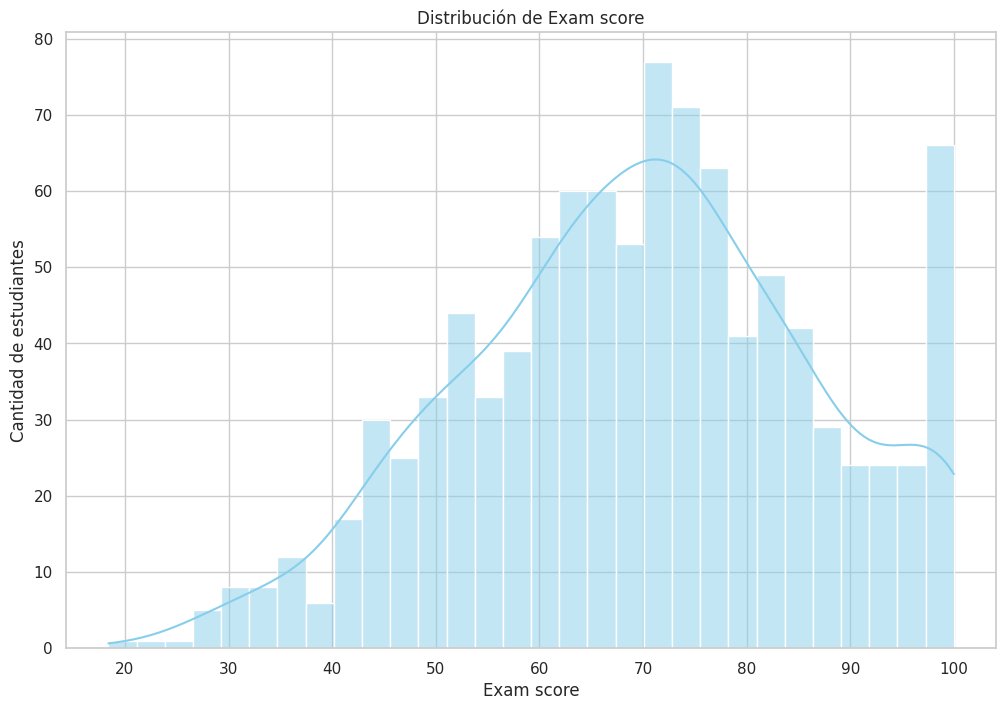

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

num_vars = [
    'study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours',
    'exercise_frequency', 'mental_health_rating', 'attendance_percentage', 'exam_score'
]

for var in num_vars:
    plt.figure()
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribución de {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Cantidad de estudiantes')
    plt.show()



### Correlaciones

Correlaciones con exam_score:
exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


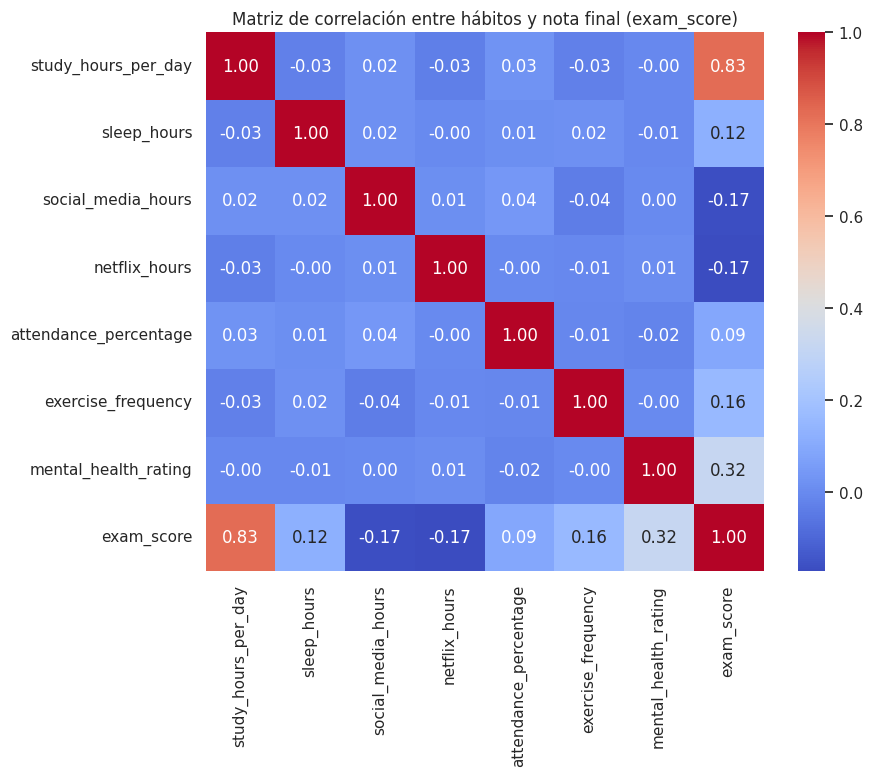

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas relevantes para correlacionar con la nota final
variables_num = [
    'study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'exercise_frequency', 'mental_health_rating', 'exam_score'
]

# Calcular matriz de correlación
corr_matrix = df[variables_num].corr()

# Mostrar correlaciones de todas con exam_score
print("Correlaciones con exam_score:")
print(corr_matrix['exam_score'].sort_values(ascending=False))

# Visualización de matriz de correlación
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre hábitos y nota final (exam_score)')
plt.show()


Análisis de correlaciones con la puntuación en el examen (`exam_score`)

Se realizó un análisis de correlación para identificar la relación entre distintas variables y el puntaje obtenido en el examen (`exam_score`). Los resultados son los siguientes:

- **Horas de estudio por día (`study_hours_per_day`)**: Presenta la correlación más alta y positiva con la puntuación del examen (r = 0.83). Esto indica que a mayor dedicación diaria al estudio, mayor es el rendimiento académico, mostrando una relación fuerte y directa.

- **Calificación de salud mental (`mental_health_rating`)**: Muestra una correlación moderada y positiva (r = 0.32) con el puntaje en el examen. Esto sugiere que un mejor estado de salud mental está asociado con mejores resultados académicos, aunque con un impacto menor en comparación con las horas de estudio.

- **Frecuencia de ejercicio (`exercise_frequency`)** y **horas de sueño (`sleep_hours`)**: Ambas variables presentan correlaciones positivas bajas (r = 0.16 y r = 0.12, respectivamente), lo que indica que aunque la actividad física y el descanso pueden influir positivamente en el rendimiento académico, su efecto es limitado.

- **Porcentaje de asistencia (`attendance_percentage`)**: Tiene una correlación baja y positiva (r = 0.09)**_**


### Distribuciones por niveles

<ipython-input-70-8cd89cfccbcc>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




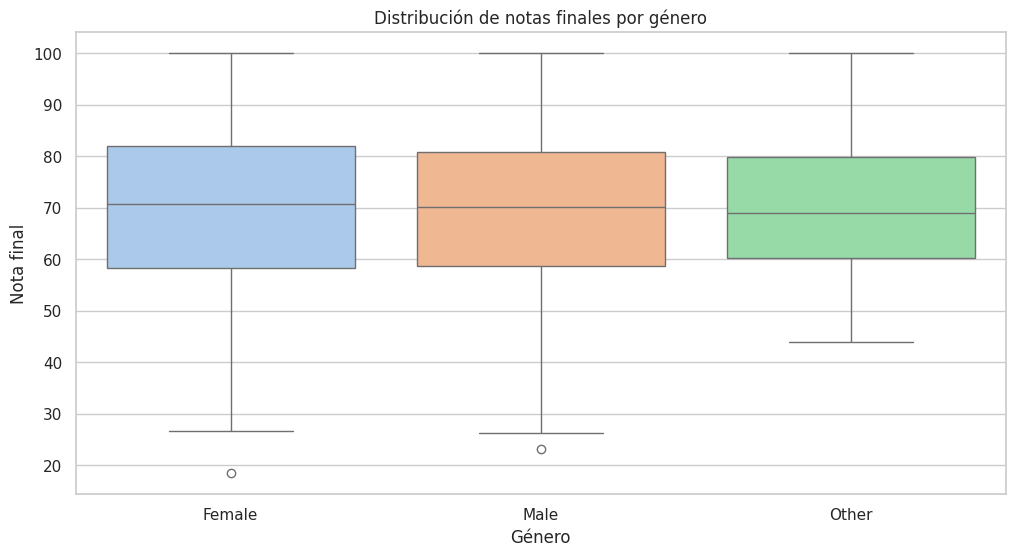

<ipython-input-70-8cd89cfccbcc>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




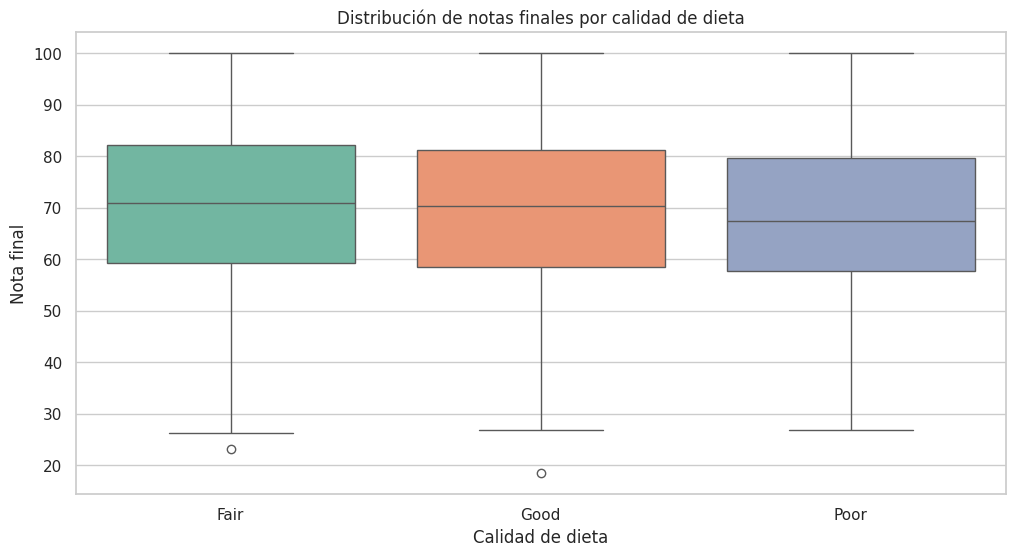

<ipython-input-70-8cd89cfccbcc>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




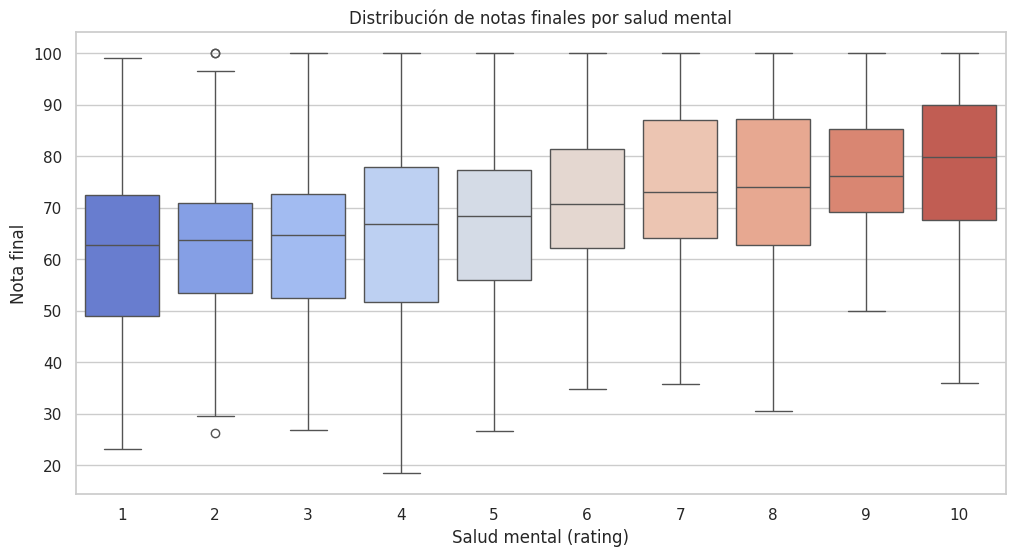

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Nota final por género
plt.figure()
sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')
plt.title('Distribución de notas finales por género')
plt.xlabel('Género')
plt.ylabel('Nota final')
plt.show()

# Nota final por calidad de dieta
plt.figure()
sns.boxplot(x='diet_quality', y='exam_score', data=df, palette='Set2')
plt.title('Distribución de notas finales por calidad de dieta')
plt.xlabel('Calidad de dieta')
plt.ylabel('Nota final')
plt.show()

# Nota final por nivel de salud mental (mental_health_rating)
plt.figure()
sns.boxplot(x='mental_health_rating', y='exam_score', data=df, palette='coolwarm')
plt.title('Distribución de notas finales por salud mental')
plt.xlabel('Salud mental (rating)')
plt.ylabel('Nota final')
plt.show()


<ipython-input-71-b0e27f136607>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




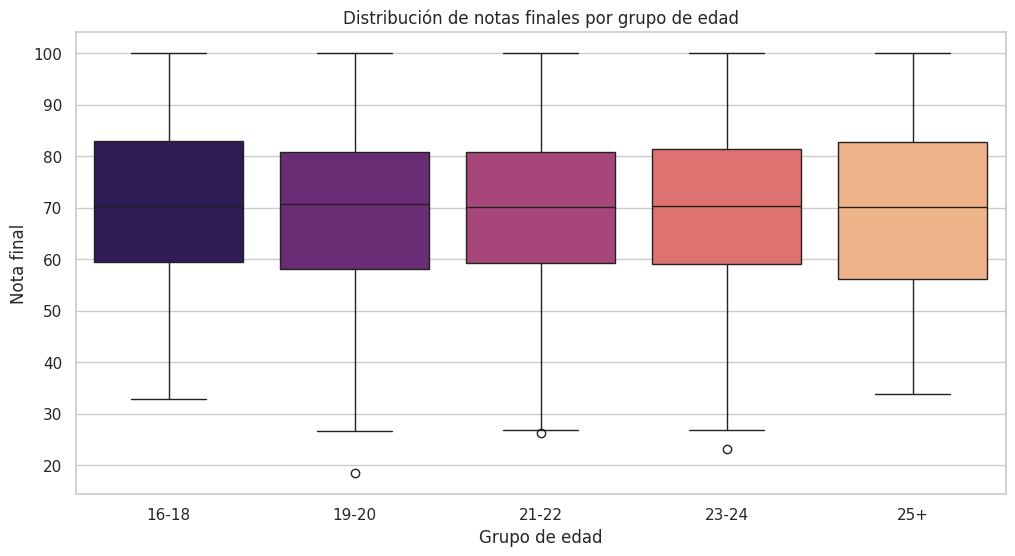

In [ ]:
# Crear categoría de grupos de edad
bins = [16, 18, 20, 22, 24, 26]
labels = ['16-18', '19-20', '21-22', '23-24', '25+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Boxplot de nota final por grupo de edad
plt.figure()
sns.boxplot(x='age_group', y='exam_score', data=df, palette='magma')
plt.title('Distribución de notas finales por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Nota final')
plt.show()


<ipython-input-72-bd60b2062ef9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




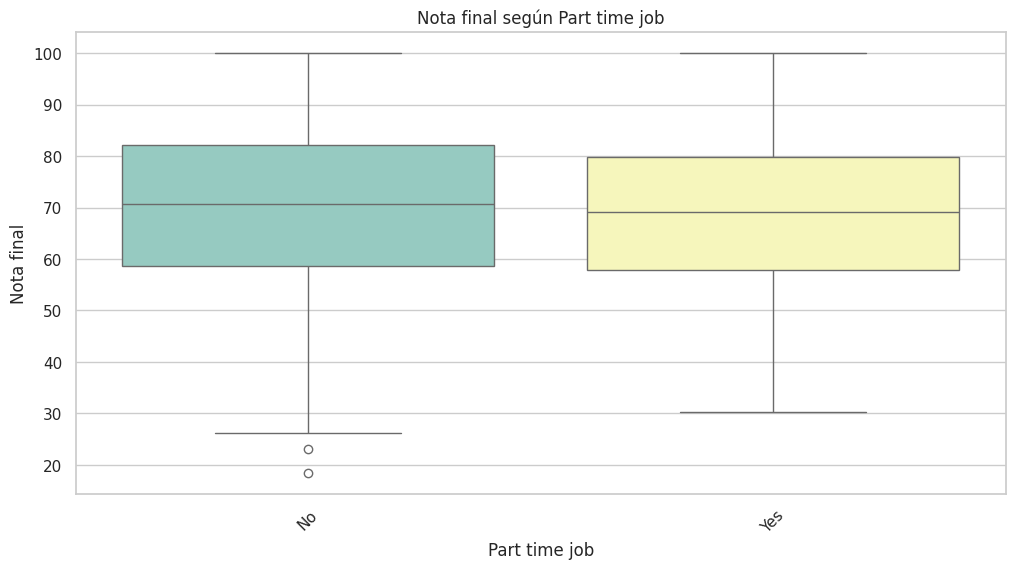

<ipython-input-72-bd60b2062ef9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




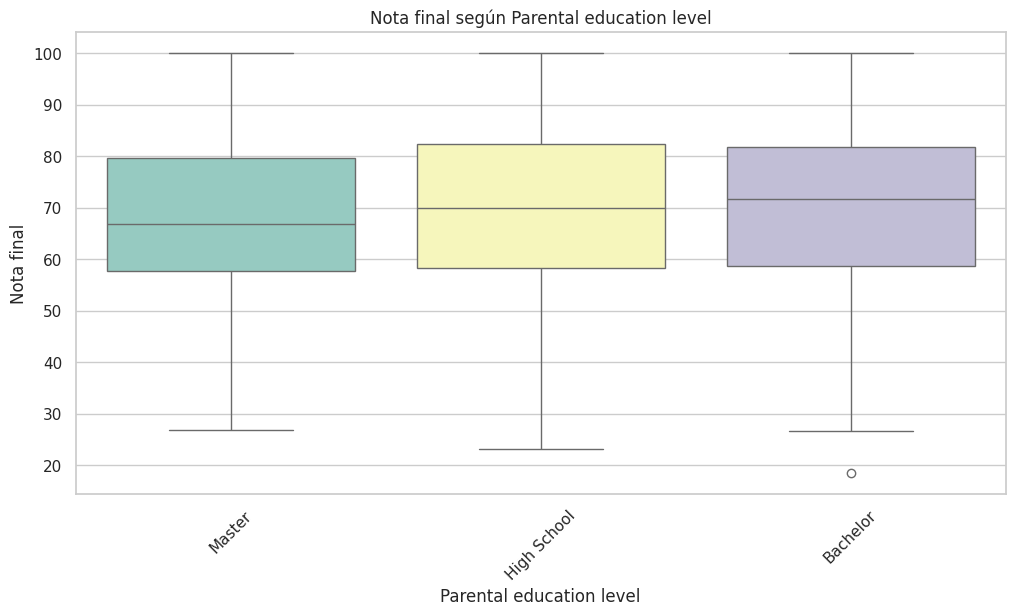

<ipython-input-72-bd60b2062ef9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




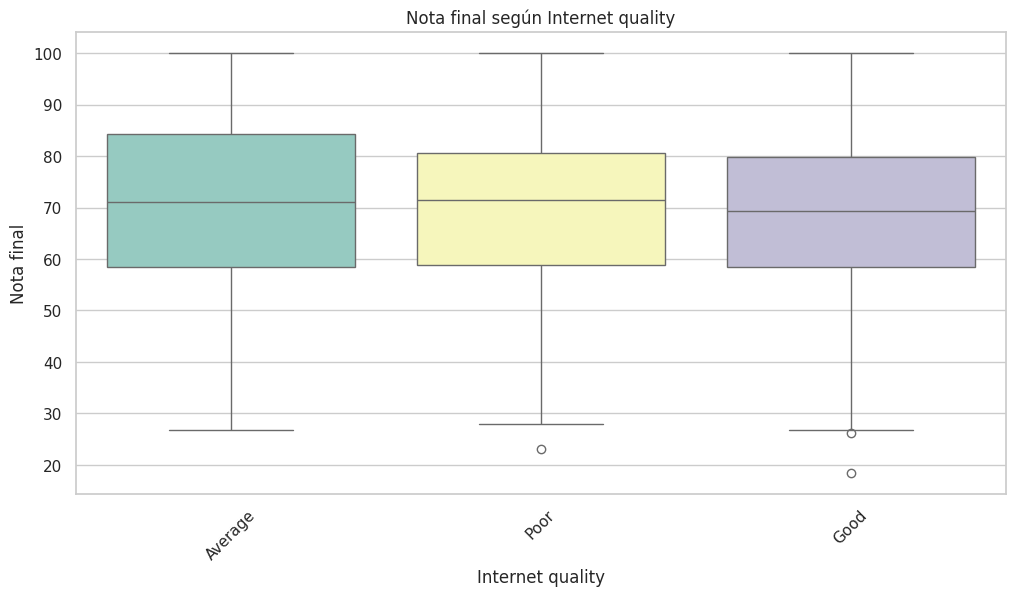

<ipython-input-72-bd60b2062ef9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




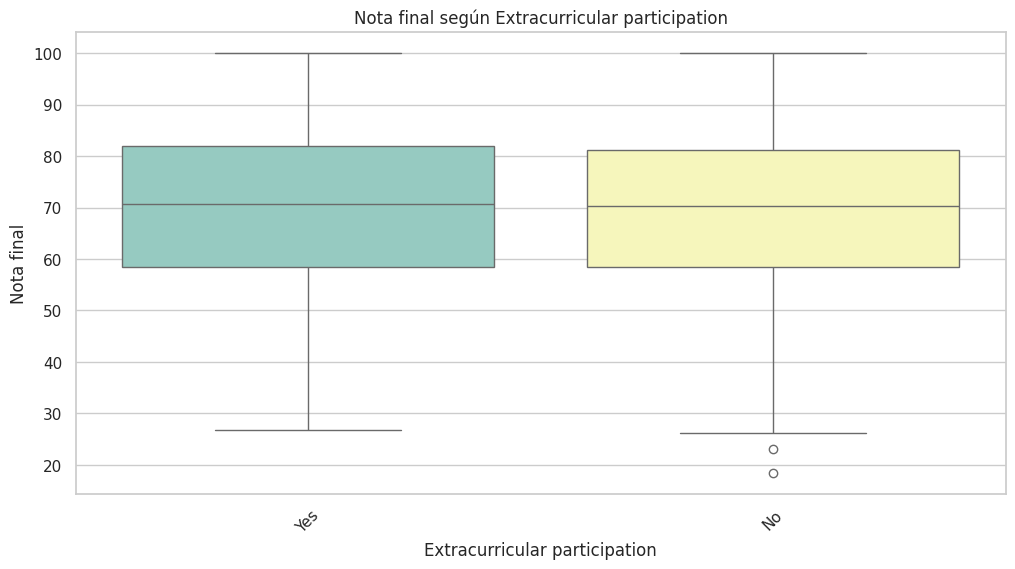

In [ ]:
categorical_vars = ['part_time_job', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

for var in categorical_vars:
    plt.figure()
    sns.boxplot(x=var, y='exam_score', data=df, palette='Set3')
    plt.title(f'Nota final según {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Nota final')
    plt.xticks(rotation=45)
    plt.show()


## Visualización de patrones 🧩

En este apartado exploramos visualmente cómo ciertos hábitos de los estudiantes se relacionan con su desempeño académico.

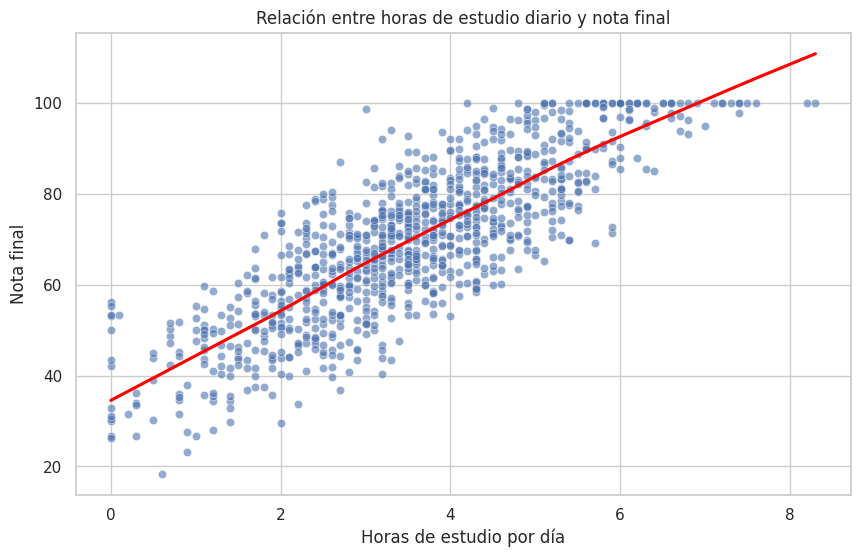

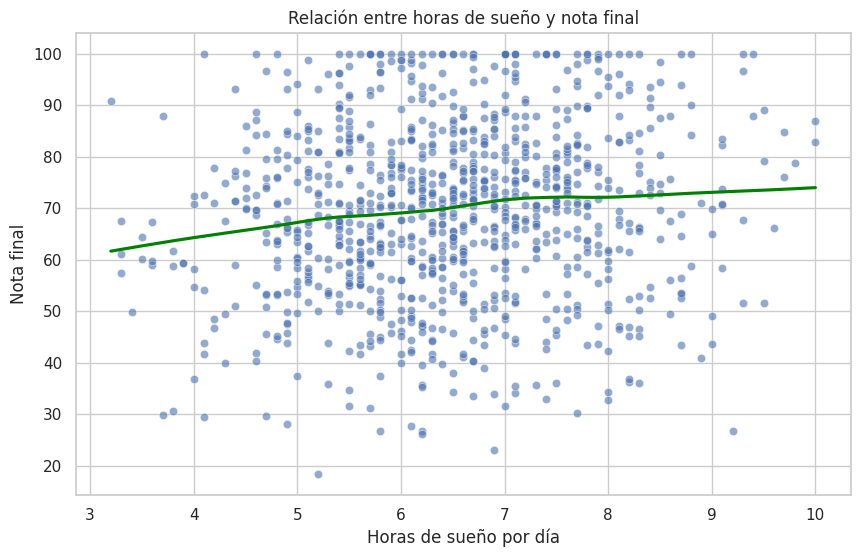

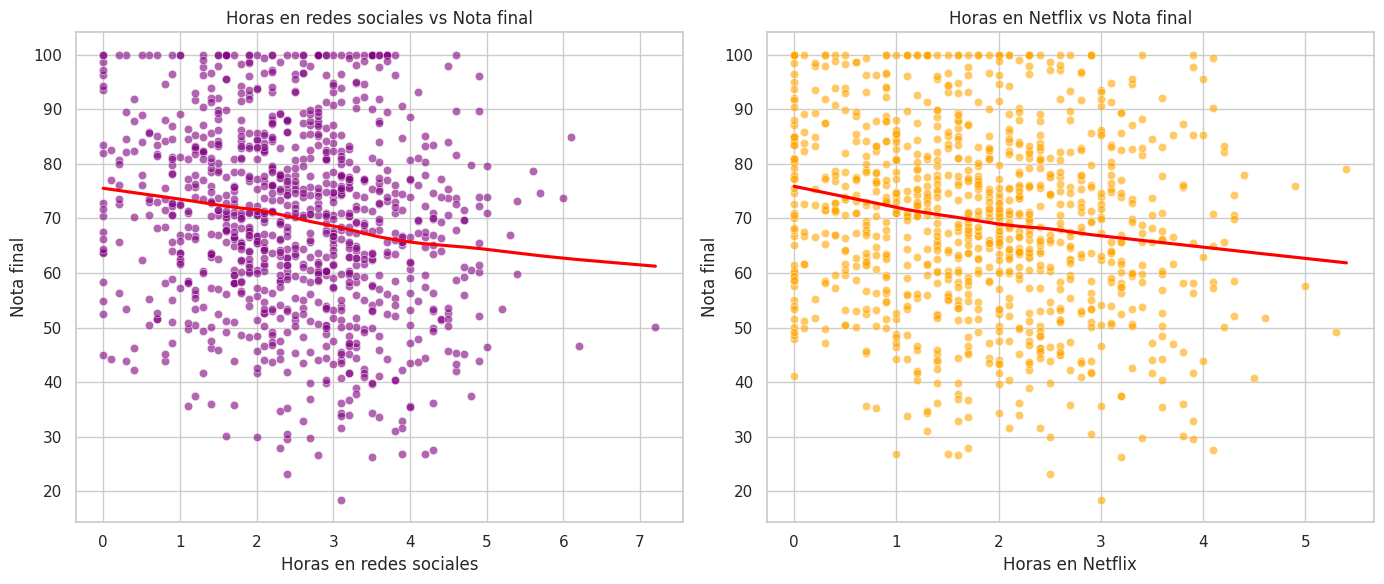

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Relación horas de estudio vs nota con suavizado (regresión local)
plt.figure()
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6)
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, lowess=True, color='red')
plt.title('Relación entre horas de estudio diario y nota final')
plt.xlabel('Horas de estudio por día')
plt.ylabel('Nota final')
plt.show()

# 2. Relación horas de sueño vs nota con suavizado
plt.figure()
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, alpha=0.6)
sns.regplot(x='sleep_hours', y='exam_score', data=df, scatter=False, lowess=True, color='green')
plt.title('Relación entre horas de sueño y nota final')
plt.xlabel('Horas de sueño por día')
plt.ylabel('Nota final')
plt.show()

# 3. Impacto de redes sociales y Netflix en nota (gráficos separados)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(x='social_media_hours', y='exam_score', data=df, alpha=0.6, ax=axes[0], color='purple')
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter=False, lowess=True, color='red', ax=axes[0])
axes[0].set_title('Horas en redes sociales vs Nota final')
axes[0].set_xlabel('Horas en redes sociales')
axes[0].set_ylabel('Nota final')

sns.scatterplot(x='netflix_hours', y='exam_score', data=df, alpha=0.6, ax=axes[1], color='orange')
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter=False, lowess=True, color='red', ax=axes[1])
axes[1].set_title('Horas en Netflix vs Nota final')
axes[1].set_xlabel('Horas en Netflix')
axes[1].set_ylabel('Nota final')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='study_hours_per_day',
                    y='sleep_hours',
                    z='exam_score',
                    color='mental_health_rating',
                    labels={
                        'study_hours_per_day': 'Horas de estudio por día',
                        'sleep_hours': 'Horas de sueño por día',
                        'exam_score': 'Nota final',
                        'mental_health_rating': 'Salud mental'
                    },
                    title='Interacción entre estudio, sueño, salud mental y nota final',
                    opacity=0.7)

fig.show()


## Modelo Predictivo Simple 🧷

Para entender mejor qué hábitos y características influyen en la nota final, construimos modelos predictivos simples: una regresión lineal y un árbol de decisión. Esto nos permitirá cuantificar la importancia relativa de cada variable y observar qué factores predicen mejor el desempeño académico.

Preparación de datos
Se codifican las variables categóricas y se seleccionan las variables predictoras más relevantes para el modelo.


### Modelo 1: Regresión lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Variables predictoras
features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours',
            'exercise_frequency', 'attendance_percentage', 'mental_health_rating',
            'part_time_job', 'diet_quality']

X = df[features]
y = df['exam_score']

# Categóricas para OneHotEncoding
categorical_features = ['part_time_job', 'diet_quality']
numerical_features = list(set(features) - set(categorical_features))

# Pipeline para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ], remainder='passthrough')

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline de regresión lineal
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Entrenar modelo
pipeline_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred = pipeline_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2_score(y_test, y_pred):.2f}')

# Obtener nombres de las columnas transformadas
encoded_cat_features = pipeline_lr.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
all_features = list(encoded_cat_features) + numerical_features

# Obtener coeficientes
coefs = pipeline_lr.named_steps['regressor'].coef_

# Crear dataframe con coeficientes y características
coef_df = pd.DataFrame({'feature': all_features, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print(coef_df)


RMSE: 5.12
R2 score: 0.90
                 feature      coef
3  attendance_percentage  9.528378
5     exercise_frequency -2.701005
6     social_media_hours -2.318110
4    study_hours_per_day  1.990410
9          netflix_hours  1.957755
7            sleep_hours  1.320777
1      diet_quality_Good -0.981021
2      diet_quality_Poor -0.576685
0      part_time_job_Yes  0.371490
8   mental_health_rating  0.144524


El modelo tiene un rendimiento muy bueno, con un R² de 0.90, lo que indica que explica el 90% de la variabilidad en las notas de examen. El error promedio en las predicciones, medido por el RMSE, es de 5.12 puntos.

Entre las variables más influyentes, la asistencia a clases (`attendance_percentage`) tiene el coeficiente más alto y positivo (9.53), mostrando que es el factor que más contribuye a mejorar la nota.

Por otro lado, la frecuencia de ejercicio y las horas dedicadas a redes sociales tienen coeficientes negativos (-2.70 y -2.32), lo que indica que un aumento en estas variables se asocia con una disminución en la nota prevista.

Variables como las horas de estudio y de Netflix también tienen un efecto positivo, aunque menor.

Las variables categóricas `diet_quality` y `part_time_job` muestran coeficientes menores, sugiriendo un impacto menos relevante en la predicción del rendimiento académico.

En resumen, la asistencia es el factor clave, mientras que ciertas actividades o hábitos pueden estar asociados con una baja en el desempeño académico según el modelo.


### Modelo 2: Árbol de decisión para regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

# Codificar variables categóricas con OrdinalEncoder
X2 = X.copy()
X2[categorical_features] = OrdinalEncoder().fit_transform(X2[categorical_features])

# Separar train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Crear y entrenar árbol de decisión
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg.fit(X_train2, y_train2)

# Predecir y evaluar
y_pred2 = tree_reg.predict(X_test2)
mse_tree = mean_squared_error(y_test2, y_pred2)
rmse_tree = np.sqrt(mse_tree)
print(f'RMSE árbol: {rmse_tree:.2f}')
print(f'R2 árbol: {r2_score(y_test2, y_pred2):.2f}')

# Importancia de variables
importances = tree_reg.feature_importances_
feat_imp = pd.DataFrame({'feature': X2.columns, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
print(feat_imp)



RMSE árbol: 8.89
R2 árbol: 0.69
                 feature  importance
0    study_hours_per_day    0.819034
6   mental_health_rating    0.113539
1            sleep_hours    0.022340
2     social_media_hours    0.018975
5  attendance_percentage    0.011526
4     exercise_frequency    0.010665
3          netflix_hours    0.003922
7          part_time_job    0.000000
8           diet_quality    0.000000


El modelo de árbol de decisión muestra un rendimiento inferior al modelo lineal, con un RMSE de 8.89 y un R² de 0.69, lo que indica que explica aproximadamente el 69% de la variabilidad en las notas.

La característica más importante para el árbol es el número de horas de estudio por día (`study_hours_per_day`), con una importancia muy alta (81.9%), dominando el impacto en las predicciones.

Otras variables como la salud mental (`mental_health_rating`) tienen menor pero significativa relevancia (11.35%), mientras que el resto de variables aportan muy poco o nada al modelo.

Las variables categóricas `part_time_job` y `diet_quality` no influyen en este modelo, ya que su importancia es cero.

En resumen, el árbol prioriza principalmente las horas de estudio y, en menor medida, la salud mental para predecir la nota, descartando el impacto de otros factores que el modelo lineal sí considera relevantes.


### Gráfica con importancia de variables (regresión lineal y árbol)


<ipython-input-77-faf0943e8a0a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-77-faf0943e8a0a>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




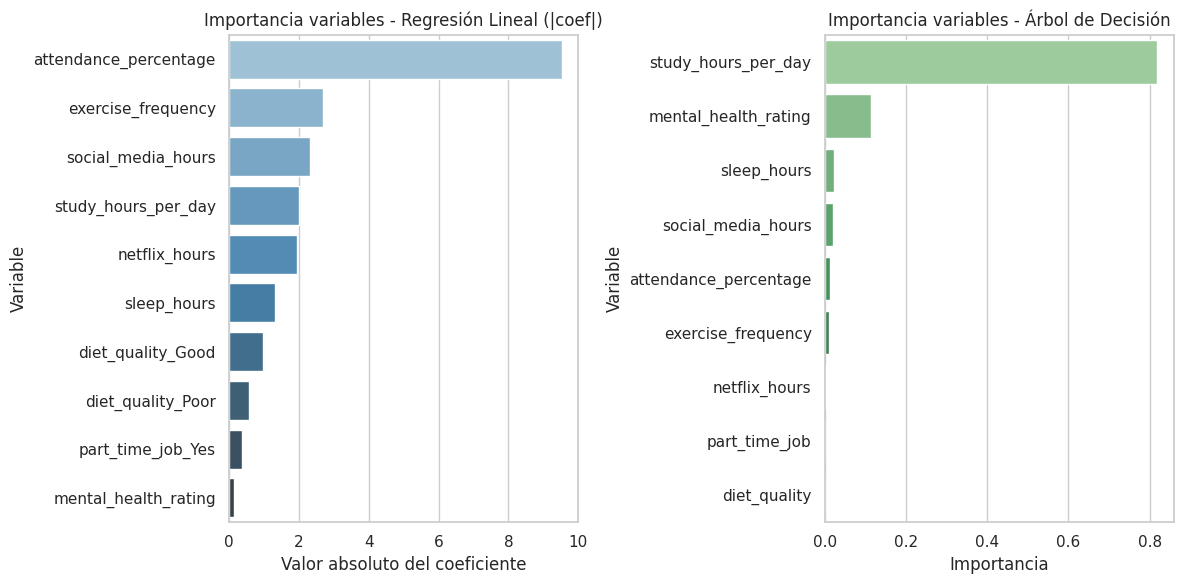

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importancia regresión lineal (coeficientes absolutos)
coef_df['abs_coef'] = coef_df['coef'].abs()

plt.figure(figsize=(12,6))

# Barra coeficientes regresión lineal
plt.subplot(1,2,1)
sns.barplot(data=coef_df.sort_values('abs_coef', ascending=False), x='abs_coef', y='feature', palette='Blues_d')
plt.title('Importancia variables - Regresión Lineal (|coef|)')
plt.xlabel('Valor absoluto del coeficiente')
plt.ylabel('Variable')

# Importancia árbol de decisión
plt.subplot(1,2,2)
sns.barplot(data=feat_imp, x='importance', y='feature', palette='Greens_d')
plt.title('Importancia variables - Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()


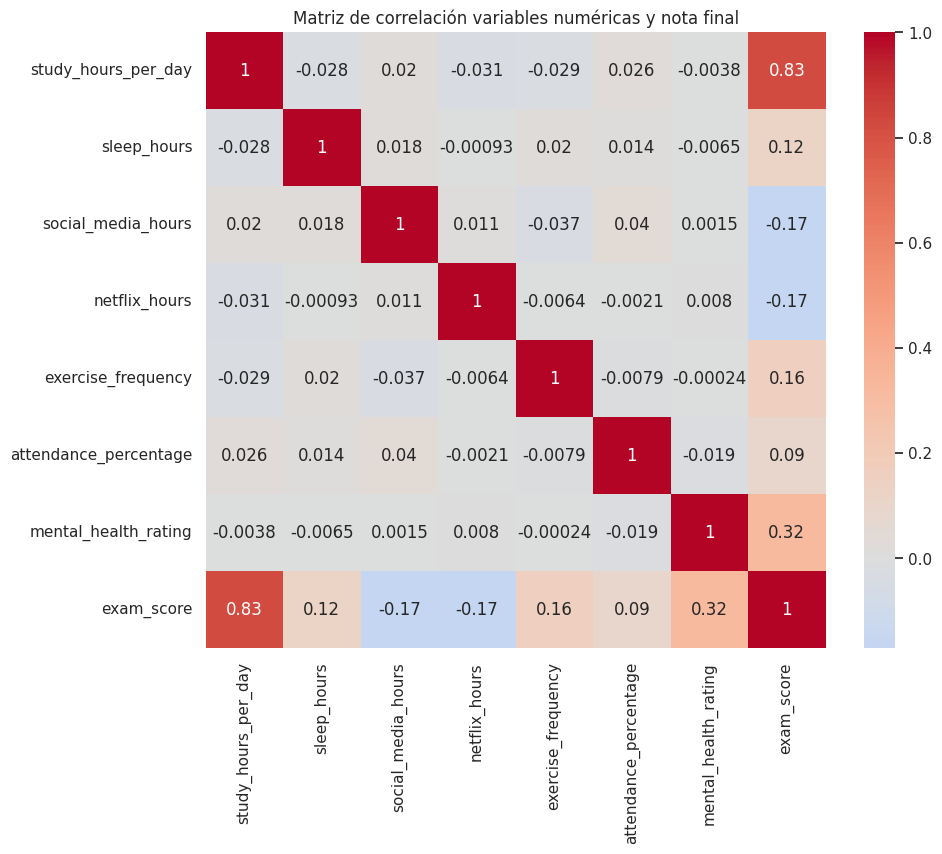

In [ ]:
# Variables numéricas dentro de features
numeric_features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours',
                    'exercise_frequency', 'attendance_percentage', 'mental_health_rating']

corr_matrix = df[numeric_features + ['exam_score']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación variables numéricas y nota final')
plt.show()



## Interacciones relevantes: 🔄


### Interacción entre horas de sueño y salud mental

In [ ]:
import statsmodels.formula.api as smf

# Modelo lineal: salud mental en función de horas de sueño
model = smf.ols('mental_health_rating ~ sleep_hours', data=df).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                   0.04227
Date:                  Thu, 29 May 2025   Prob (F-statistic):              0.837
Time:                          13:03:55   Log-Likelihood:                -2464.9
No. Observations:                  1000   AIC:                             4934.
Df Residuals:                       998   BIC:                             4944.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.5358      0.

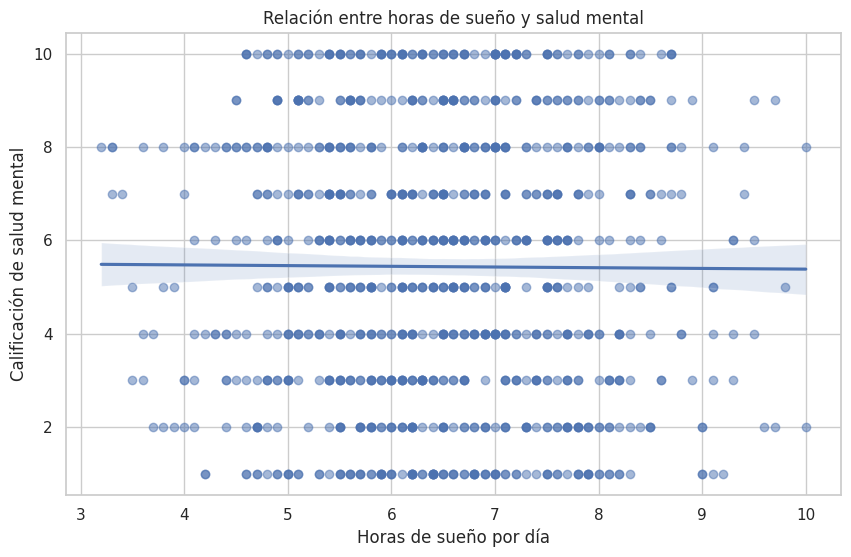

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='sleep_hours', y='mental_health_rating', data=df, scatter_kws={'alpha':0.5})
plt.title("Relación entre horas de sueño y salud mental")
plt.xlabel("Horas de sueño por día")
plt.ylabel("Calificación de salud mental")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Crear grupo de salud mental basado en el rating numérico
# Supongamos: Bajo (1-3), Medio (4-6), Alto (7-10)
def clasificar_salud_mental(rating):
    if rating <= 3:
        return 'Bajo'
    elif rating <= 6:
        return 'Medio'
    else:
        return 'Alto'

df['mental_health_group'] = df['mental_health_rating'].apply(clasificar_salud_mental)

# Convertir a categoría ordenada
df['mental_health_group'] = pd.Categorical(df['mental_health_group'],
                                            categories=['Bajo', 'Medio', 'Alto'],
                                            ordered=True)

# Modelo con interacción entre salud mental y horas de sueño
model_sleep = smf.ols('exam_score ~ sleep_hours * mental_health_group', data=df).fit()

# Ver resumen
print(model_sleep.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     25.41
Date:                Thu, 29 May 2025   Prob (F-statistic):           3.57e-24
Time:                        13:03:56   Log-Likelihood:                -4184.9
No. Observations:                1000   AIC:                             8382.
Df Residuals:                     994   BIC:                             8411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

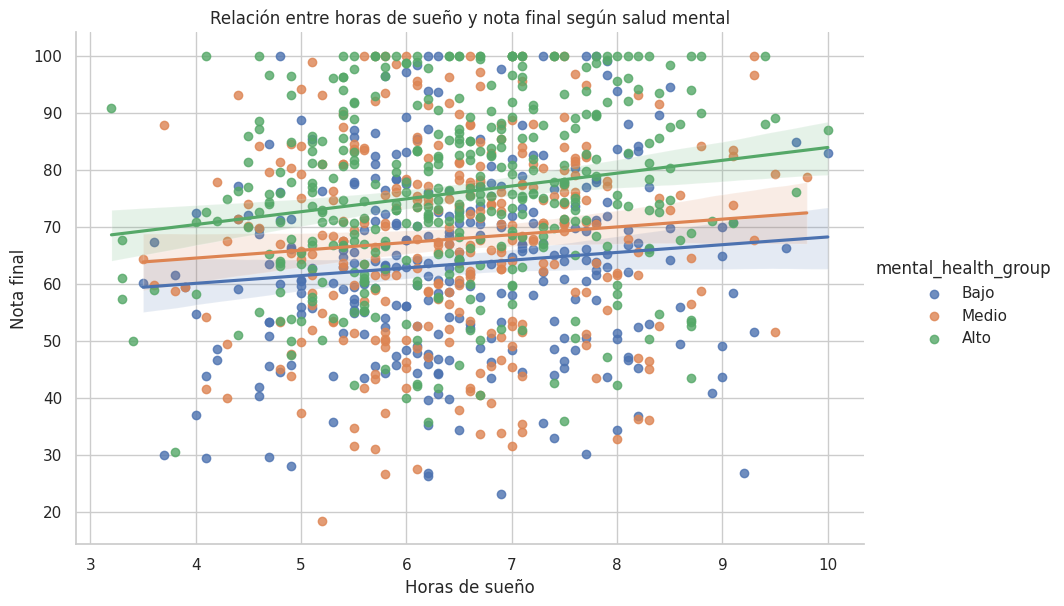

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='sleep_hours', y='exam_score', hue='mental_health_group', data=df, height=6, aspect=1.5)
plt.title('Relación entre horas de sueño y nota final según salud mental')
plt.xlabel('Horas de sueño')
plt.ylabel('Nota final')
plt.show()


Conclusión sobre la interacción entre horas de sueño y salud mental

Los resultados del modelo de regresión lineal simple muestran que las horas de sueño no tienen un efecto significativo sobre la calificación de salud mental (`mental_health_rating`). El coeficiente estimado para `sleep_hours` es cercano a cero (-0.0151) y la prueba de significancia (p = 0.837) indica que esta variable no explica variabilidad relevante en la salud mental de los participantes. Esto se refleja en un R-cuadrado prácticamente nulo (0.000), evidenciando que las horas de sueño por sí solas no predicen la salud mental en esta muestra.

Por otro lado, al considerar un modelo más complejo que incluye la interacción entre horas de sueño y grupos de salud mental para predecir la nota del examen (`exam_score`), observamos que aunque las horas de sueño presentan una relación positiva con la nota (coeficiente = 1.3553, p = 0.064), las interacciones con los distintos niveles de salud mental no son significativas. Esto sugiere que, en este conjunto de datos, las horas de sueño pueden tener un efecto moderadamente positivo en el rendimiento académico, independiente del nivel de salud mental reportado, pero no existe evidencia clara de que la salud mental modere dicha relación.

En resumen, la evidencia estadística indica que las horas de sueño, consideradas junto con la salud mental, no muestran una interacción significativa para explicar la variabilidad en la nota final. Por tanto, otros factores podrían ser más determinantes en la relación entre hábitos de sueño, salud mental y desempeño académico en esta población.



### Interacción entre horas de estudio y salud mental

In [ ]:
import statsmodels.formula.api as smf

# Modelo lineal: salud mental en función de horas de sueño
model = smf.ols('mental_health_rating ~ sleep_hours', data=df).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                   0.04227
Date:                  Thu, 29 May 2025   Prob (F-statistic):              0.837
Time:                          13:03:57   Log-Likelihood:                -2464.9
No. Observations:                  1000   AIC:                             4934.
Df Residuals:                       998   BIC:                             4944.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.5358      0.

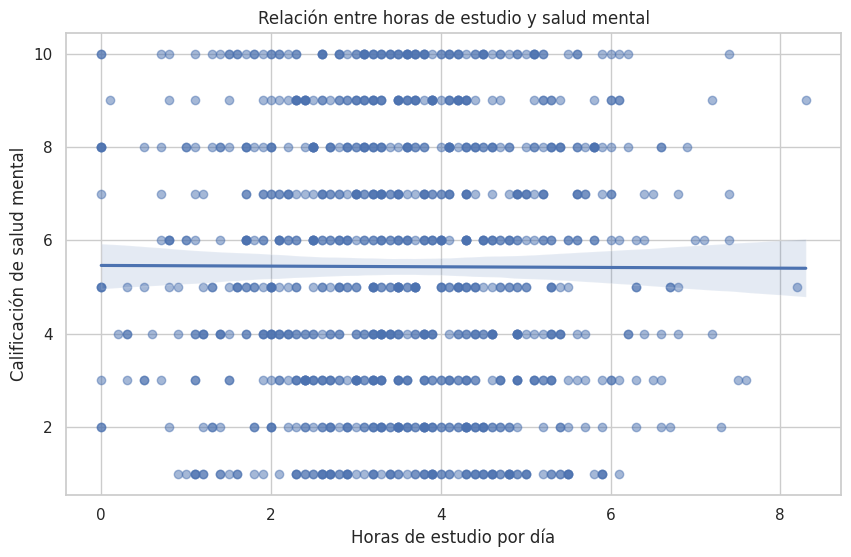

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='study_hours_per_day', y='mental_health_rating', data=df, scatter_kws={'alpha':0.5})
plt.title("Relación entre horas de estudio y salud mental")
plt.xlabel("Horas de estudio por día")
plt.ylabel("Calificación de salud mental")
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# Crear variable categórica para salud mental
df['mental_health_group'] = pd.Categorical(df['mental_health_group'], categories=['Bajo','Medio','Alto'], ordered=True)

# Modelo con interacción entre horas de estudio y salud mental
model = smf.ols('exam_score ~ study_hours_per_day * mental_health_group', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     698.6
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.77e-322
Time:                        13:03:58   Log-Likelihood:                -3491.5
No. Observations:                1000   AIC:                             6995.
Df Residuals:                     994   BIC:                             7024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

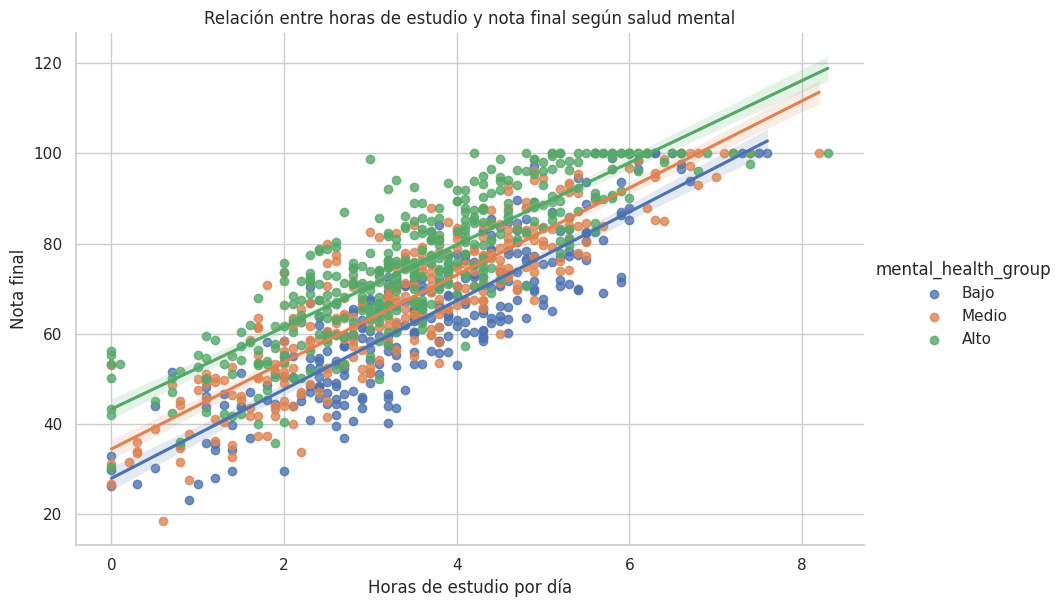

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='study_hours_per_day', y='exam_score', hue='mental_health_group', data=df, height=6, aspect=1.5)
plt.title('Relación entre horas de estudio y nota final según salud mental')
plt.xlabel('Horas de estudio por día')
plt.ylabel('Nota final')
plt.show()


Conclusión sobre la interacción entre horas de sueño y salud mental

El análisis de regresión muestra que las horas de sueño no tienen un efecto significativo sobre la calificación de salud mental (`mental_health_rating`). El coeficiente para `sleep_hours` es muy cercano a cero (-0.0151) y no es estadísticamente significativo (p = 0.837), reflejando un ajuste nulo del modelo (R-cuadrado = 0.000). Esto indica que las horas de sueño, consideradas aisladamente, no predicen la salud mental en esta muestra.

En cuanto a la predicción del rendimiento académico (`exam_score`), el modelo que incluye horas de estudio diarias, grupos de salud mental y su interacción explica una proporción muy alta de la variabilidad en las notas (R-cuadrado = 0.778). Se observa que tanto un mayor nivel de salud mental como más horas de estudio se asocian con un aumento significativo en la nota final. Sin embargo, las interacciones entre horas de estudio y grupos de salud mental no resultan significativas, lo que sugiere que el efecto positivo de estudiar más horas sobre el rendimiento académico es consistente independientemente del nivel de salud mental.

En síntesis, aunque las horas de sueño no parecen afectar la salud mental, esta última junto con las horas de estudio son variables clave para explicar el desempeño académico. La interacción entre horas de estudio y salud mental no modifica sustancialmente esta relación en este conjunto de datos.


> Tener buena salud mental ayuda a que la relación entre estudiar y rendimiento sea menos dependiente de aumentar mucho las horas, posiblemente porque esos estudiantes tienen mejores mecanismos de concentración, gestión del estrés o eficiencia al estudiar.



### Interacción entre horas de ejercicio y salud mental

In [ ]:
df['exercise_frequency'] = pd.to_numeric(df['exercise_frequency'], errors='coerce')

# Modelo donde la variable dependiente es la salud mental
import statsmodels.formula.api as smf

model = smf.ols('mental_health_rating ~ exercise_frequency', data=df).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                 5.859e-05
Date:                  Thu, 29 May 2025   Prob (F-statistic):              0.994
Time:                          13:03:59   Log-Likelihood:                -2464.9
No. Observations:                  1000   AIC:                             4934.
Df Residuals:                       998   BIC:                             4944.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

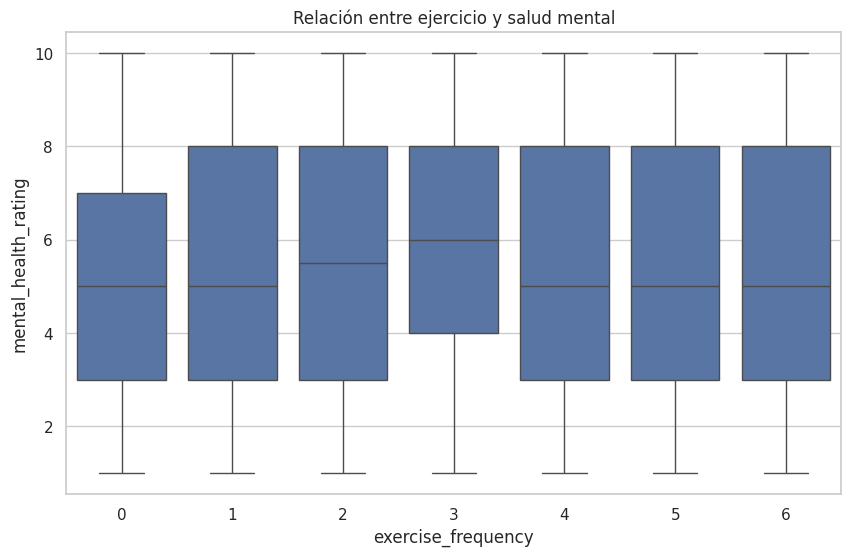

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='exercise_frequency', y='mental_health_rating', data=df)
plt.title("Relación entre ejercicio y salud mental")
plt.show()


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Crear variable categórica para salud mental (si no está creada)
df['mental_health_group'] = pd.Categorical(df['mental_health_group'], categories=['Bajo', 'Medio', 'Alto'], ordered=True)

# Modelo con interacción entre ejercicio y salud mental
model_exercise = smf.ols('exam_score ~ exercise_frequency * mental_health_group', data=df).fit()

print(model_exercise.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     28.03
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.26e-26
Time:                        13:03:59   Log-Likelihood:                -4179.1
No. Observations:                1000   AIC:                             8370.
Df Residuals:                     994   BIC:                             8400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<Figure size 1000x600 with 0 Axes>

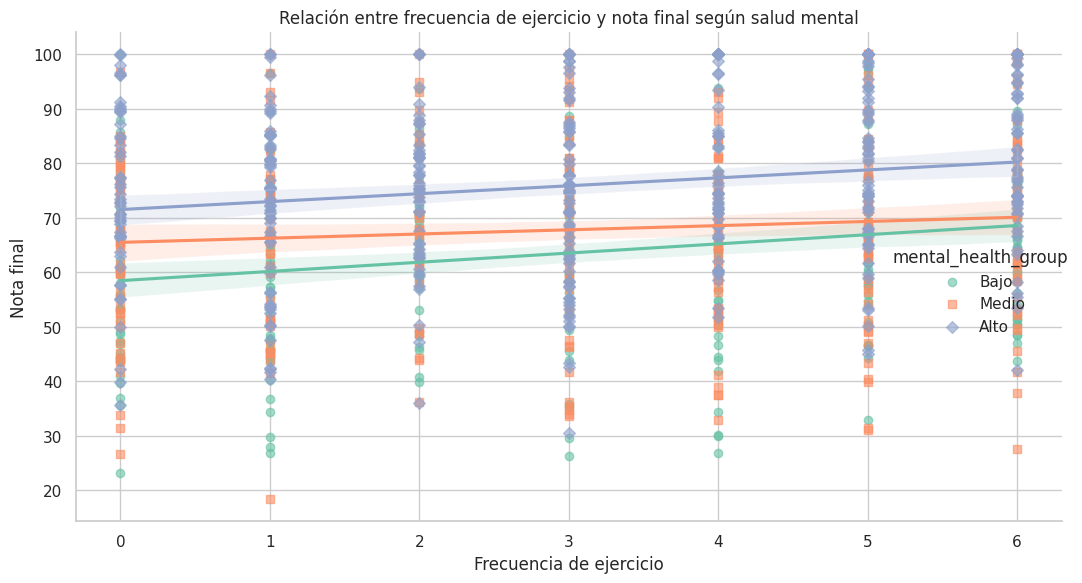

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.lmplot(
    x='exercise_frequency',
    y='exam_score',
    hue='mental_health_group',
    data=df,
    height=6,
    aspect=1.5,
    palette='Set2',
    markers=['o', 's', 'D'],
    scatter_kws={'alpha':0.6}
)

plt.title('Relación entre frecuencia de ejercicio y nota final según salud mental')
plt.xlabel('Frecuencia de ejercicio')
plt.ylabel('Nota final')
plt.tight_layout()
plt.show()


Conclusión sobre la interacción entre frecuencia de ejercicio y salud mental

El análisis de regresión lineal indica que la frecuencia de ejercicio no tiene un efecto significativo sobre la calificación de salud mental (`mental_health_rating`). El coeficiente para `exercise_frequency` es prácticamente cero (-0.0003) y con un valor p muy alto (0.994), reflejando un modelo sin poder explicativo (R-cuadrado = 0.000). Esto sugiere que la frecuencia con la que los estudiantes realizan ejercicio no está asociada con su salud mental en este conjunto de datos.

En relación con el rendimiento académico (`exam_score`), el modelo que considera la frecuencia de ejercicio, los grupos de salud mental y su interacción explica una parte modesta de la variabilidad en las notas (R-cuadrado = 0.139). Se observa que algunas categorías de frecuencia de ejercicio, específicamente aquellas con mayor frecuencia (5 y 6 días), tienen un efecto positivo y significativo sobre el puntaje del examen, mientras que niveles bajos de ejercicio no muestran impacto significativo. Además, los niveles más altos de salud mental también se asocian con mejores resultados académicos.

Sin embargo, las interacciones entre frecuencia de ejercicio y grupos de salud mental no resultan estadísticamente significativas, lo que indica que el efecto del ejercicio sobre la nota final no varía según el nivel de salud mental del estudiante.

En resumen, aunque la frecuencia de ejercicio no se relaciona directamente con la salud mental, el ejercicio frecuente y un mejor estado de salud mental contribuyen positivamente al rendimiento académico, actuando de forma independiente en este contexto.


### Interacción entre calidad de dieta y salud mental

In [ ]:
import statsmodels.formula.api as smf

# Modelo lineal: salud mental en función de calidad de la dieta
model = smf.ols('mental_health_rating ~ C(diet_quality)', data=df).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     2.595
Date:                  Thu, 29 May 2025   Prob (F-statistic):             0.0751
Time:                          13:04:00   Log-Likelihood:                -2462.3
No. Observations:                  1000   AIC:                             4931.
Df Residuals:                       997   BIC:                             4945.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

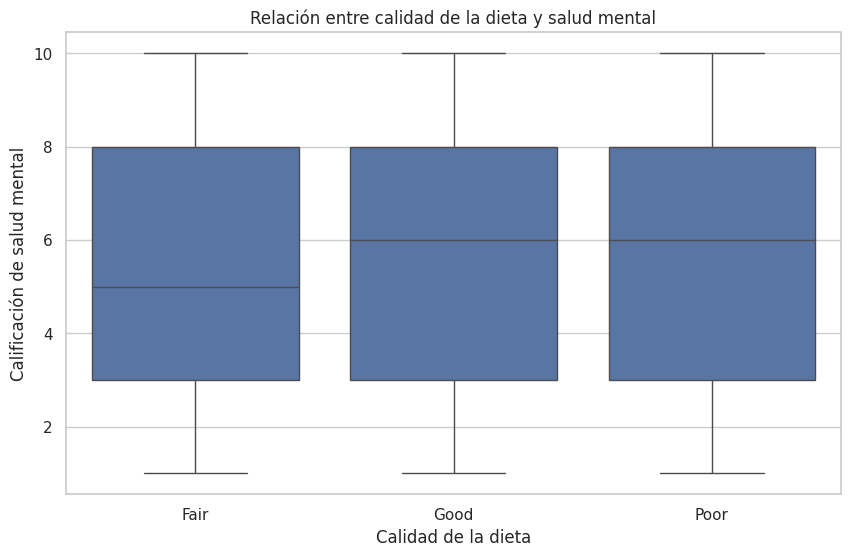

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='diet_quality', y='mental_health_rating', data=df)
plt.title("Relación entre calidad de la dieta y salud mental")
plt.xlabel("Calidad de la dieta")
plt.ylabel("Calificación de salud mental")
plt.show()


In [ ]:
# Modelo con interacción entre calidad de dieta y salud mental
model_diet = smf.ols('exam_score ~ diet_quality * mental_health_group', data=df).fit()

print(model_diet.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     14.69
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.99e-20
Time:                        13:04:01   Log-Likelihood:                -4189.0
No. Observations:                1000   AIC:                             8396.
Df Residuals:                     991   BIC:                             8440.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

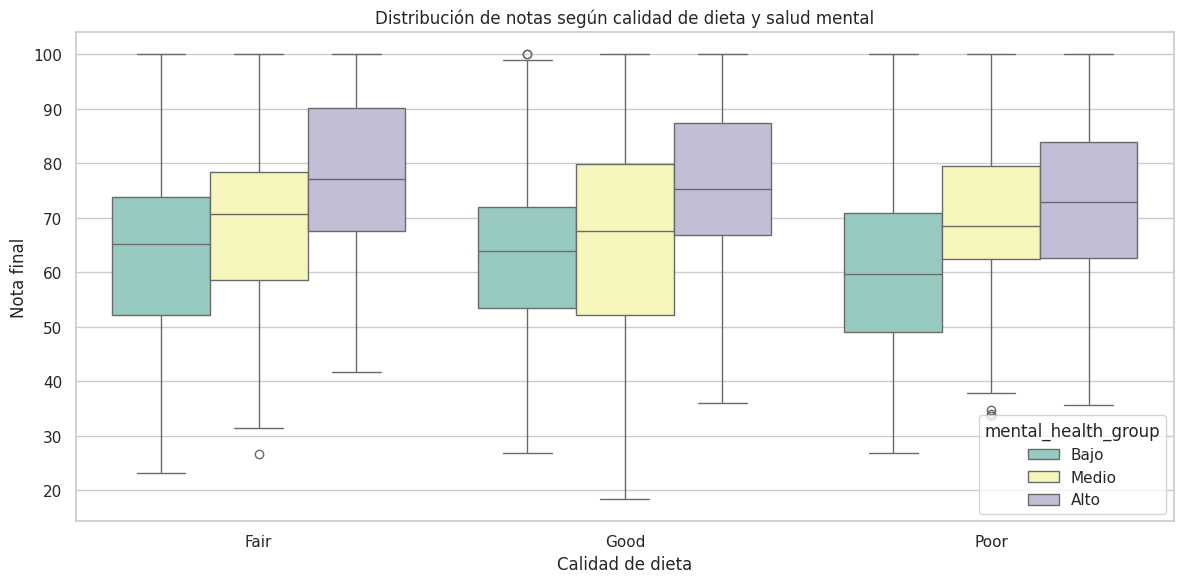

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='diet_quality', y='exam_score', hue='mental_health_group', data=df, palette='Set3')
plt.title('Distribución de notas según calidad de dieta y salud mental')
plt.xlabel('Calidad de dieta')
plt.ylabel('Nota final')
plt.tight_layout()
plt.show()


Conclusión sobre la interacción entre calidad de dieta y salud mental

El modelo de regresión lineal para la calificación de salud mental muestra que tener una calidad de dieta buena se asocia con un ligero aumento significativo en la salud mental percibida (coeficiente = 0.44, p = 0.029), aunque el efecto es pequeño y el modelo explica muy poca variabilidad (R² = 0.005). La dieta pobre no muestra un efecto significativo respecto a la categoría de referencia.

En cuanto al rendimiento académico (`exam_score`), la calidad de la dieta por sí sola no es un predictor significativo del puntaje en el examen, con coeficientes no significativos tanto para la dieta buena como para la pobre. Por otro lado, los grupos de salud mental medio y alto sí muestran efectos positivos y significativos sobre el rendimiento académico, lo que indica que un mejor estado de salud mental está asociado con mejores notas.

Las interacciones entre calidad de dieta y grupos de salud mental no resultan estadísticamente significativas, sugiriendo que el impacto de la salud mental en el rendimiento académico no varía según la calidad de la dieta.

En resumen, aunque una mejor calidad de dieta se asocia ligeramente con mejor salud mental, esta relación no se traslada directamente al rendimiento académico, donde la salud mental juega un papel más relevante e independiente.


## Conclusiones y recomendaciones 📝


A partir del análisis realizado, hemos identificado qué hábitos y factores personales parecen tener una influencia más significativa en el rendimiento académico de los estudiantes, medido por la nota final del examen.


### ¿Qué hábitos parecen más influyentes?



- **Horas de estudio por día:** Este es, sin duda, el factor más determinante según ambos modelos. El modelo de regresión lineal mostró un coeficiente alto y positivo, y el árbol de decisión lo identificó como la variable con mayor importancia predictiva. Dedicar más tiempo al estudio está fuertemente correlacionado con una nota final más alta.

- **Salud mental:** El estado de salud mental autoevaluado también tiene un impacto positivo y significativo en el rendimiento académico. Tanto el modelo lineal como el árbol de decisión mostraron que una mejor calificación de salud mental se asocia con notas más altas.

- **Asistencia a clases:** Aunque no apareció como la variable más importante en el árbol de decisión, el modelo de regresión lineal le asignó el coeficiente más alto, sugiriendo que asistir a clases regularmente es un factor clave para obtener buenas notas.

- **Horas en redes sociales y Netflix:** Pasar mucho tiempo en redes sociales y viendo contenido en streaming se asocia con notas finales más bajas, según el modelo de regresión lineal. Estos hábitos parecen tener un efecto negativo en el rendimiento académico.

- **Frecuencia de ejercicio:** El modelo lineal sugirió que una mayor frecuencia de ejercicio puede estar asociada con notas ligeramente más bajas, aunque la correlación directa fue baja. El árbol de decisión le dio una importancia muy baja.

- **Horas de sueño:** Si bien se observó una ligera correlación positiva, las horas de sueño no aparecieron como un predictor fuerte en ninguno de los modelos principales. Tampoco se encontró una interacción significativa con la salud mental en la predicción de la nota.

- **Calidad de dieta y trabajo a tiempo parcial:** Estas variables mostraron una influencia

### Recomendaciones


Basándonos en los patrones observados y la fuerza de la relación, podemos ofrecer las siguientes recomendaciones generales (ten en cuenta que estas son estimaciones basadas en este conjunto de datos simulado y no deben tomarse como reglas exactas para todos):

1. **Prioriza tus horas de estudio:** Los datos sugieren fuertemente que aumentar el tiempo dedicado al estudio es la estrategia más efectiva para mejorar tu nota. Aunque no podemos dar un porcentaje exacto sin un análisis más profundo por rangos, la tendencia indica que si aumentas tus horas de estudio por día, tu nota final tiene una alta probabilidad de mejorar significativamente.

2. **Cuida tu salud mental:** Mantener un buen estado de salud mental está asociado con un mejor rendimiento académico. Busca estrategias para gestionar el estrés y mantener tu bienestar emocional.

3. **Asiste a clases:** La asistencia a clases parece ser un predictor importante de éxito. Procura no faltar a tus lecciones.

4. **Modera el uso de redes sociales y plataformas de streaming:** Limitar el tiempo que pasas en redes sociales y Netflix puede tener un impacto positivo en tu concentración y, consecuentemente, en tu nota final.

5. **Encuentra un equilibrio con el ejercicio:** Si bien el ejercicio es importante para la salud, el análisis no mostró una relación clara y positiva con la nota final. Encuentra un equilibrio que te permita mantenerte saludable sin sacrificar tiempo crucial de estudio o descanso.

6. **Establece una rutina de sueño adecuada:** Aunque las horas de sueño no fueron el predictor más fuerte, dormir lo suficiente es fundamental para la concentración y el aprendizaje. Intenta mantener un horario de sueño regular.

**En resumen:** Para mejorar tu rendimiento académico, enfócate principalmente en aumentar tus horas de estudio, cuidar tu salud mental y asegurar una buena asistencia a clases. Limitar el tiempo en redes sociales y streaming también parece ser beneficioso.

## Ideas para expandir 🚀


Aunque el análisis realizado ofrece una visión inicial sobre cómo ciertos hábitos influyen en la nota final de los estudiantes, existen varias oportunidades para ampliar y profundizar el estudio, con el fin de hacerlo más realista, robusto y útil para la toma de decisiones.

**1. Incorporar datos longitudinales:**  
Actualmente, el dataset se basa en una instantánea temporal. Contar con datos recogidos a lo largo del tiempo permitiría observar cómo cambian los hábitos y su impacto en el rendimiento académico, ayudando a identificar tendencias, efectos acumulativos o periodos críticos.

**2. Añadir variables contextuales y sociodemográficas:**  
Variables como el entorno familiar, el nivel socioeconómico, el acceso a recursos educativos, el tipo de institución, o el apoyo psicológico podrían aportar una comprensión más profunda y realista del rendimiento académico y sus condicionantes.

**3. Implementar un dashboard interactivo:**  
Un dashboard dinámico facilitaría la exploración de datos por parte de estudiantes, docentes y orientadores, permitiendo filtrar por variables específicas, visualizar tendencias y detectar patrones personalizados que ayuden en la toma de decisiones individuales y colectivas.

**4. Aplicar técnicas de clustering o segmentación:**  
Agrupar estudiantes con hábitos y resultados similares mediante clustering podría ayudar a identificar perfiles o tipos de estudiantes con necesidades y comportamientos particulares, optimizando así la personalización de recomendaciones y estrategias educativas.

**5. Incluir modelos predictivos más complejos y explicables:**  
Incorporar técnicas como Random Forest, Gradient Boosting o redes neuronales, acompañadas de métodos explicativos como SHAP o LIME, permitiría mejorar la precisión predictiva y entender mejor las contribuciones de cada hábito a la nota final.

**6. Evaluar interacciones más complejas entre hábitos:**  
Explorar interacciones multifactoriales no lineales entre los hábitos, por ejemplo, cómo la combinación simultánea de ejercicio, alimentación y horas de estudio influye en el rendimiento, para generar recomendaciones más completas y realistas.

**7. Recoger y analizar datos cualitativos:**  
Complementar el análisis cuantitativo con encuestas, entrevistas o diarios de hábitos permitiría captar aspectos subjetivos y emocionales que influyen en la motivación y rendimiento, no siempre evidentes en datos numéricos.

Estas ampliaciones y mejoras no solo enriquecerían el análisis, sino que también lo acercarían más a las condiciones reales y complejas que enfrentan los estudiantes, permitiendo diseñar intervenciones educativas más efectivas y personalizadas.
